In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Read data frame from csv file
data_frame = pd.read_csv("D:/14_Data Scientist/Datasets/House Data_Pune.csv")
data_frame

,area_type,location,Society,size,Baths,total_sqft,price,availability,Unnamed: 8,Unnamed: 9
0,Super Built-up Area,Bavdhan,Satyam Shrey,2 bhk,2.0,640,55.96,Under construction,NaN,NaN
1,Built-up Area,Sus,Kiran Sanskriti,2 bhk,2.0,690-720,45.00,Under construction,NaN,NaN
2,Built-up Area,Tathawade,Vivanta,2 bhk,2.0,688-693,60.00,Under construction,NaN,NaN
3,Super Built-up Area,Koregaon Park,Sunit Anant,3 bhk,3.0,1659,210.00,Ready to move,NaN,NaN
4,Built-up Area,Sinhgad Road,Nanded city,3 bhk,3.0,1450,78.00,Ready to move,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1624,NaN,Sinhgad Road,NaN,2 bhk,2.0,1175,73.50,NaN,NaN,NaN
1625,NaN,Koregaon Park,NaN,2 bhk,2.0,1425,80.00,NaN,NaN,NaN
1626,NaN,Swargate,NaN,1 bhk,1.0,1200,20.00,NaN,NaN,NaN
1627,NaN,Karve Nagar,NaN,3 bhk,3.0,1200,56.12,NaN,NaN,NaN


In [4]:
data_frame.head(10)

,area_type,location,Society,size,Baths,total_sqft,price,availability,Unnamed: 8,Unnamed: 9
0,Super Built-up Area,Bavdhan,Satyam Shrey,2 bhk,2.0,640,55.96,Under construction,NaN,NaN
1,Built-up Area,Sus,Kiran Sanskriti,2 bhk,2.0,690-720,45.00,Under construction,NaN,NaN
2,Built-up Area,Tathawade,Vivanta,2 bhk,2.0,688-693,60.00,Under construction,NaN,NaN
3,Super Built-up Area,Koregaon Park,Sunit Anant,3 bhk,3.0,1659,210.00,Ready to move,NaN,NaN
4,Built-up Area,Sinhgad Road,Nanded city,3 bhk,3.0,1450,78.00,Ready to move,NaN,NaN
5,Super Built-up Area,Koregaon Park,New Akshaya,2 bhk,2.0,1300,100.00,Ready to move,NaN,NaN
6,Super Built-up Area,Bibwewadi,Sukhsagar Nagar,2 bhk,2.0,850-950,50.00,Ready to move,NaN,NaN
7,Super Built-up Area,Koregaon Park,Tulip,2 bhk,2.0,1080,95.00,Ready to move,NaN,NaN
8,Built-up Area,Dhankawadi,Ganga Altus,3 bhk,3.0,850-950,87.50,Under construction,NaN,NaN
9,Built-up Area,Dhankawadi,Ganga Altus,2 bhk,2.0,650-750,67.50,Under construction,NaN,NaN


In [5]:
data_frame.columns

Index(['area_type', 'location', 'Society', 'size', 'Baths', 'total_sqft',
       'price', 'availability', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [6]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     647 non-null    object 
 1   location      1629 non-null   object 
 2   Society       302 non-null    object 
 3   size          1626 non-null   object 
 4   Baths         1616 non-null   float64
 5   total_sqft    1628 non-null   object 
 6   price         1629 non-null   float64
 7   availability  629 non-null    object 
 8   Unnamed: 8    0 non-null      float64
 9   Unnamed: 9    1 non-null      object 
dtypes: float64(3), object(7)
memory usage: 127.4+ KB


In [7]:
# Need to remove Unnamed columns from data frame so we can use drop method or as selected below

# Taking required columns only 

data_frame = data_frame[['area_type', 'location', 'Society', 'size', 'Baths', 'total_sqft','price', 'availability']]
data_frame.head(3)

,area_type,location,Society,size,Baths,total_sqft,price,availability
0,Super Built-up Area,Bavdhan,Satyam Shrey,2 bhk,2.0,640,55.96,Under construction
1,Built-up Area,Sus,Kiran Sanskriti,2 bhk,2.0,690-720,45.00,Under construction
2,Built-up Area,Tathawade,Vivanta,2 bhk,2.0,688-693,60.00,Under construction


In [8]:
data_frame.describe()

,Baths,price
count,1616.000000,1629.000000
mean,2.529703,107.008677
std,1.277230,135.486900
min,1.000000,11.000000
25%,2.000000,47.600000
50%,2.000000,70.000000
75%,3.000000,115.000000
max,11.000000,2200.000000


In [9]:
data_frame.area_type.unique()

array(['Super Built-up Area', 'Built-up Area', 'Plot Area', nan,
       'Carpet Area', 'Built-up area', 'Villa', 'Built-up  Area',
       'Super built-up  Area', 'Plot  Area'], dtype=object)

In [10]:
data_frame.area_type.value_counts()

Super built-up  Area    193
Built-up Area           175
Super Built-up Area     152
Built-up  Area           56
Plot  Area               42
Plot Area                21
Built-up area             4
Carpet Area               3
Villa                     1
Name: area_type, dtype: int64

In [11]:
data_frame['area_type'] = data_frame['area_type'].replace(['Plot  Area'],['Plot Area'])
data_frame['area_type'] = data_frame['area_type'].replace(['Super built-up  Area'],['Super Built-up Area'])
data_frame['area_type'] = data_frame['area_type'].replace(['Built-up area'],['Built-up Area'])
data_frame['area_type'] = data_frame['area_type'].replace(['Built-up  Area'],['Built-up Area'])

In [12]:
data_frame.area_type.value_counts()

Super Built-up Area    345
Built-up Area          235
Plot Area               63
Carpet Area              3
Villa                    1
Name: area_type, dtype: int64

In [13]:
data_frame.area_type.value_counts().to_dict()

{'Super Built-up Area': 345,
 'Built-up Area': 235,
 'Plot Area': 63,
 'Carpet Area': 3,
 'Villa': 1}

In [14]:
data_frame['size'].value_counts()

2 bhk     666
3 bhk     514
1 bhk     184
4 bhk     152
5 bhk      35
6 bhk      32
8 bhk      14
7 bhk      12
1 RK        6
9 bhk       4
1 Rk        2
10 bhk      1
3           1
1 rk        1
1  bhk      1
11 bhk      1
Name: size, dtype: int64

In [15]:
data_frame['size'].isna().sum()

3

In [16]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     647 non-null    object 
 1   location      1629 non-null   object 
 2   Society       302 non-null    object 
 3   size          1626 non-null   object 
 4   Baths         1616 non-null   float64
 5   total_sqft    1628 non-null   object 
 6   price         1629 non-null   float64
 7   availability  629 non-null    object 
dtypes: float64(2), object(6)
memory usage: 101.9+ KB


In [18]:
import re

In [19]:
type(data_frame['size'][0])

str

In [20]:
def remove_bhk(input_string):
    output_string = re.sub(r'\s\w+', '', input_string)
    return output_string

In [21]:
data_frame['size'] =data_frame['size'].astype('str')

In [22]:
data_frame['size'] = data_frame['size'].apply(remove_bhk)

<AxesSubplot:>

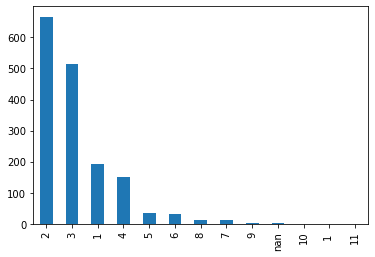

In [28]:
data_frame['size'].value_counts().plot(kind='bar')

<AxesSubplot:>

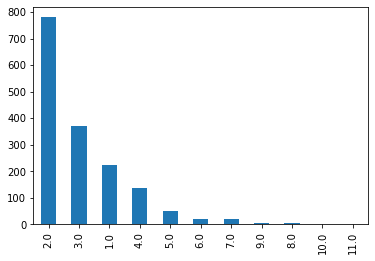

In [30]:
data_frame.Baths.value_counts().plot(kind='bar')

AttributeError: 'Rectangle' object has no property 'bins'

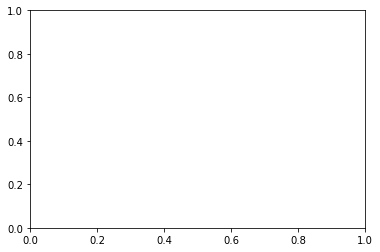

In [32]:
data_frame.location.value_counts().plot(kind='bar')

<AxesSubplot:>

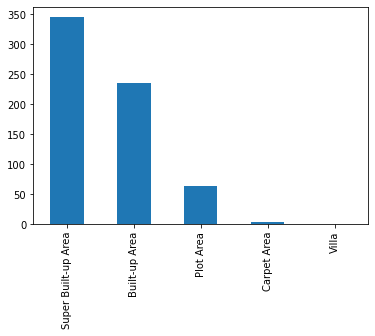

In [33]:
data_frame['area_type'].value_counts().plot(kind='bar')

In [27]:
data_frame['size'] =data_frame['size'].fillna(method ='ffill')

In [28]:
data_frame['size'].isna().sum()

0

In [29]:
data_frame['size'].value_counts()

2      666
3      515
1      193
4      152
5       35
6       32
8       14
7       12
9        4
nan      3
10       1
1        1
11       1
Name: size, dtype: int64

In [30]:
data_frame['size'].value_counts().to_dict()

{'2': 666,
 '3': 515,
 '1': 193,
 '4': 152,
 '5': 35,
 '6': 32,
 '8': 14,
 '7': 12,
 '9': 4,
 'nan': 3,
 '10': 1,
 '1 ': 1,
 '11': 1}

In [31]:
data_frame['size'] = data_frame['size'].replace(['nan'],['2'])

In [32]:
data_frame['size'] = data_frame['size'].astype('int')

In [33]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     647 non-null    object 
 1   location      1629 non-null   object 
 2   Society       302 non-null    object 
 3   size          1629 non-null   int32  
 4   Baths         1616 non-null   float64
 5   total_sqft    1628 non-null   object 
 6   price         1629 non-null   float64
 7   availability  629 non-null    object 
dtypes: float64(2), int32(1), object(5)
memory usage: 95.6+ KB


In [34]:
data_frame['Baths'] = data_frame['Baths'].fillna(data_frame['size'])

In [35]:
data_frame['Baths'].value_counts()

2.0     783
3.0     370
1.0     223
4.0     145
5.0      53
6.0      22
7.0      19
9.0       6
8.0       6
10.0      1
11.0      1
Name: Baths, dtype: int64

In [36]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     647 non-null    object 
 1   location      1629 non-null   object 
 2   Society       302 non-null    object 
 3   size          1629 non-null   int32  
 4   Baths         1629 non-null   float64
 5   total_sqft    1628 non-null   object 
 6   price         1629 non-null   float64
 7   availability  629 non-null    object 
dtypes: float64(2), int32(1), object(5)
memory usage: 95.6+ KB


In [37]:
data_frame['total_sqft'] =data_frame['total_sqft'].astype('str')

In [38]:
type(data_frame['total_sqft'][100])

str

In [39]:
x = '627.1-200'
type(x)

str

In [40]:
x = x.split('-')
x

['627.1', '200']

In [41]:
def literal_price(x):
    m = 0
    a = x.split('-')
    for i in a:
        m = float(i)+m
        
        
    
    return m//2

In [42]:
data_frame['total_sqft'] =data_frame['total_sqft'].apply(literal_price)

In [43]:
data_frame['total_sqft']

0       320.0
1       705.0
2       690.0
3       829.0
4       725.0
        ...  
1624    587.0
1625    712.0
1626    600.0
1627    600.0
1628    627.0
Name: total_sqft, Length: 1629, dtype: float64

In [44]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     647 non-null    object 
 1   location      1629 non-null   object 
 2   Society       302 non-null    object 
 3   size          1629 non-null   int32  
 4   Baths         1629 non-null   float64
 5   total_sqft    1628 non-null   float64
 6   price         1629 non-null   float64
 7   availability  629 non-null    object 
dtypes: float64(3), int32(1), object(4)
memory usage: 95.6+ KB


In [45]:
data = data_frame[data_frame['price']==12.0]
data

,area_type,location,Society,size,Baths,total_sqft,price,availability
125,Plot Area,Katraj,Khulshi,2,2.0,NaN,12.0,NaN
224,Built-up Area,Katraj,Shree Ganesh Vihar,1,1.0,132.0,12.0,Under construction


In [46]:
data_frame.columns

Index(['area_type', 'location', 'Society', 'size', 'Baths', 'total_sqft',
       'price', 'availability'],
      dtype='object')

In [47]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     647 non-null    object 
 1   location      1629 non-null   object 
 2   Society       302 non-null    object 
 3   size          1629 non-null   int32  
 4   Baths         1629 non-null   float64
 5   total_sqft    1628 non-null   float64
 6   price         1629 non-null   float64
 7   availability  629 non-null    object 
dtypes: float64(3), int32(1), object(4)
memory usage: 95.6+ KB


In [48]:
data_frame.columns

Index(['area_type', 'location', 'Society', 'size', 'Baths', 'total_sqft',
       'price', 'availability'],
      dtype='object')

In [49]:
data_frame = data_frame[['area_type', 'location', 'size', 'Baths', 'total_sqft',
       'price', 'availability']]

In [50]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     647 non-null    object 
 1   location      1629 non-null   object 
 2   size          1629 non-null   int32  
 3   Baths         1629 non-null   float64
 4   total_sqft    1628 non-null   float64
 5   price         1629 non-null   float64
 6   availability  629 non-null    object 
dtypes: float64(3), int32(1), object(3)
memory usage: 82.8+ KB


In [51]:
# data_frame_Bib= data_frame[data_frame['location']=='Bibwewadi']

In [52]:
# data_frame_Bib.area_type.value_counts()

In [53]:
data_frame.area_type.value_counts()

Super Built-up Area    345
Built-up Area          235
Plot Area               63
Carpet Area              3
Villa                    1
Name: area_type, dtype: int64

In [54]:
data_frame['area_type'] = data_frame['area_type'].fillna('Built-up Area')

In [55]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1629 non-null   object 
 1   location      1629 non-null   object 
 2   size          1629 non-null   int32  
 3   Baths         1629 non-null   float64
 4   total_sqft    1628 non-null   float64
 5   price         1629 non-null   float64
 6   availability  629 non-null    object 
dtypes: float64(3), int32(1), object(3)
memory usage: 82.8+ KB


In [56]:
data_frame['availability'] = data_frame['availability'].fillna('No_info_available')

In [57]:
data_frame.isna().count()

area_type       1629
location        1629
size            1629
Baths           1629
total_sqft      1629
price           1629
availability    1629
dtype: int64

In [58]:
data_frame['total_sqft'] = data_frame['total_sqft'].replace(np.NaN,data_frame['total_sqft'].median())

In [59]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1629 non-null   object 
 1   location      1629 non-null   object 
 2   size          1629 non-null   int32  
 3   Baths         1629 non-null   float64
 4   total_sqft    1629 non-null   float64
 5   price         1629 non-null   float64
 6   availability  1629 non-null   object 
dtypes: float64(3), int32(1), object(3)
memory usage: 82.8+ KB


In [60]:
data_frame['availability'] = data_frame['availability'].replace(['Ready to move'],['Ready To Move'])
data_frame['availability'] = data_frame['availability'].replace(['Ready to Move'],['Ready To Move'])

In [61]:
data_frame['availability'] = np.where(data_frame['availability'].isin(['No_info_available','Ready To Move','Under construction','Immediate Possession'])
                                      ,data_frame['availability']
                                     ,'Under construction')

In [62]:
data_frame['availability'].value_counts().to_dict()

{'No_info_available': 1000,
 'Ready To Move': 497,
 'Under construction': 131,
 'Immediate Possession': 1}

In [63]:
from sklearn.preprocessing import OneHotEncoder

OHE_area_type = OneHotEncoder(sparse=False)

OHE_area_type_df = OHE_area_type.fit_transform(data_frame['area_type'].values.reshape(-1,1))

OHE_area_type_df = pd.DataFrame(OHE_area_type_df,columns=OHE_area_type.categories_,index=data_frame.index)

#OHE_area_type_df     


In [64]:
OHE_location = OneHotEncoder(sparse=False)
OHE_location_df = OHE_location.fit_transform(data_frame['location'].values.reshape(-1,1))
OHE_location_df = pd.DataFrame(OHE_location_df,columns=OHE_location.categories_,index=data_frame.index)
OHE_location_df

,AB Chowk,Amanora Town,Amanora town,Ambegaon,Balaji Nagar,Baner,Bavdhan,Bibwewadi,Budhwar Peth,Bund Garden,...,Samarth Nagar,Shivaji Nagar,Shivraj Nagar,Sinhgad Road,Sus,Swargate,Tathawade,Vighnaharta Nagar,Vitthal nagar,Wakad
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
OHE_availability = OneHotEncoder(sparse=False)
OHE_availability_df = OHE_availability.fit_transform(data_frame['availability'].values.reshape(-1,1))
OHE_availability_df = pd.DataFrame(OHE_availability_df,columns=OHE_availability.categories_,index=data_frame.index)
OHE_availability_df

,Immediate Possession,No_info_available,Ready To Move,Under construction
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
1624,0.0,1.0,0.0,0.0
1625,0.0,1.0,0.0,0.0
1626,0.0,1.0,0.0,0.0
1627,0.0,1.0,0.0,0.0


In [66]:
final_df = pd.concat([data_frame,OHE_area_type_df,OHE_availability_df,OHE_location_df],axis=1)
final_df.drop(['area_type','availability','location'],axis=1,inplace=True)
final_df

,size,Baths,total_sqft,price,"(Built-up Area,)","(Carpet Area,)","(Plot Area,)","(Super Built-up Area,)","(Villa,)","(Immediate Possession,)",...,"(Samarth Nagar,)","(Shivaji Nagar,)","(Shivraj Nagar,)","(Sinhgad Road,)","(Sus,)","(Swargate,)","(Tathawade,)","(Vighnaharta Nagar,)","(Vitthal nagar,)","(Wakad,)"
0,2,2.0,320.0,55.96,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2.0,705.0,45.00,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,2.0,690.0,60.00,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,3.0,829.0,210.00,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,3.0,725.0,78.00,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,2,2.0,587.0,73.50,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1625,2,2.0,712.0,80.00,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1626,1,1.0,600.0,20.00,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1627,3,3.0,600.0,56.12,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
print(type(OHE_area_type_df))
print(type(OHE_location_df))
print(type(OHE_availability_df))
print(type(data_frame))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [68]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# final_df = pd.DataFrame(scaler.fit_transform(final_df),columns=final_df.columns)
# final_df

In [69]:
x = final_df.drop('price',axis=1)
y = final_df['price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [70]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# data_frame = pd.DataFrame(scaler.fit_transform(data_frame),columns=data_frame.columns)
# data_frame

In [71]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [72]:
# Trainig evaluation

training_pred = lr.predict(x_train)
error = mean_squared_error(y_train,training_pred)

r2score = r2_score(y_train,training_pred)

print('Mean_square_error---',error)
print("R2score---",r2score)

Mean_square_error--- 7439.504047879809
R2score--- 0.5833324632565008


In [73]:
# Test evaluation

test_pred = lr.predict(x_test)
error = mean_squared_error(y_test,test_pred)

r2score = r2_score(y_test,test_pred)

print('Mean_square_error---',error)
print("R2score---",r2score)

Mean_square_error--- 17969.02987785306
R2score--- 0.07800526523898288
